In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.fillna({"Embarked" : "S"},inplace = True)

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
data["Age"].fillna(data["Age"].median(),inplace=True)

C:\Users\Prajwal\AppData\Local\Temp\ipykernel_16184\2601391910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(),inplace=True)


In [11]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [15]:
sex_mapping={"male":1,"female":0}
data["Sex"]=data["Sex"].map(sex_mapping)

Embarked_mapping={"S":1,"C":2,"Q":3}
data["Embarked"]=data["Embarked"].map(Embarked_mapping)

C:\Users\Prajwal\AppData\Local\Temp\ipykernel_16184\2032869523.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=data, palette="coolwarm")


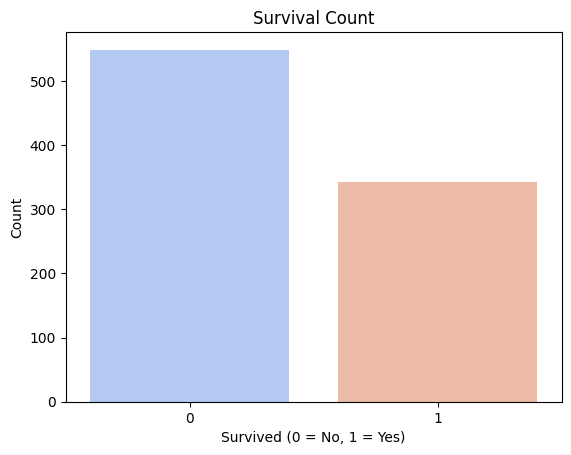

In [22]:
sns.countplot(x="Survived", data=data, palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

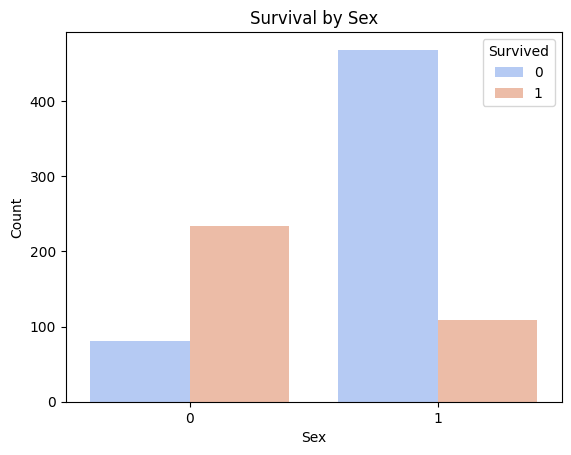

In [23]:
sns.countplot(x="Sex", hue="Survived", data=data, palette="coolwarm")
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

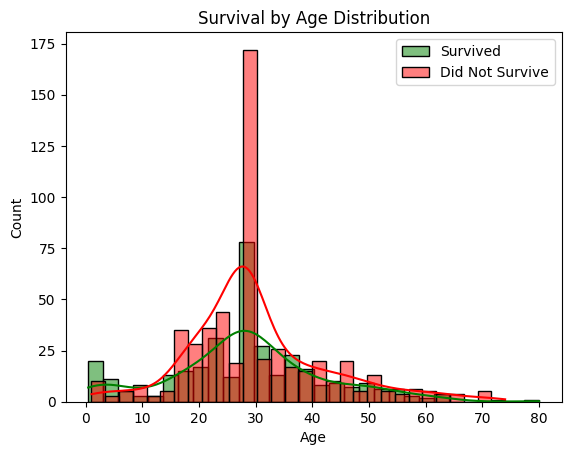

In [24]:
sns.histplot(data[data["Survived"] == 1]["Age"], bins=30, kde=True, color="green", label="Survived")
sns.histplot(data[data["Survived"] == 0]["Age"], bins=30, kde=True, color="red", label="Did Not Survive")
plt.legend()
plt.title("Survival by Age Distribution")
plt.xlabel("Age")
plt.show()


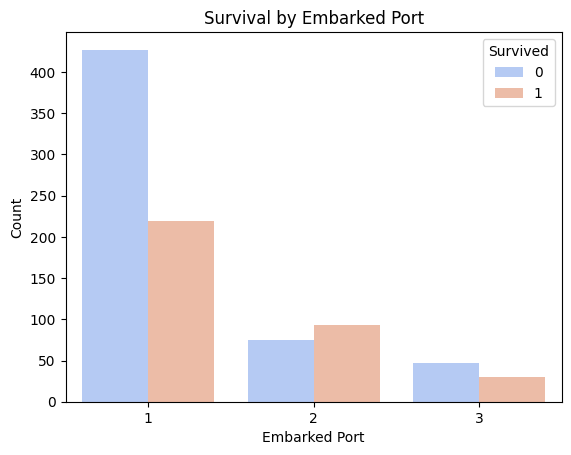

In [25]:
sns.countplot(x="Embarked", hue="Survived", data=data, palette="coolwarm")
plt.title("Survival by Embarked Port")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.show()


In [26]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [61]:
predictors=data.drop(['Survived','PassengerId'],axis=1)
target = data["Survived"]
x_train,x_val,y_train,y_val=train_test_split(predictors,target,test_size=0.2,random_state=0)

In [62]:
#Logistic Regression

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_val)
accuracy_logistic=round(accuracy_score(y_pred,y_val)*100,2)
print(accuracy_logistic)

82.12


C:\Users\Prajwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
#Hyperparameter for logistic Regression
param_grid_lr = {
    'C':[0.01,0.1,10,100],
    'penalty': ['l1','l2'],
    'solver':['liblinear']
    }
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5,scoring='accuracy')
grid_lr.fit(x_train, y_train)
print(grid_lr.best_params_)
print((grid_lr.best_score_)*100)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
81.0381168127647


In [64]:
#Random Forest Classifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_val)
accuracy_Random_Forest=round(accuracy_score(y_pred,y_val)*100,2)
print(accuracy_Random_Forest)

83.24


In [65]:
#Hyperparametr for Random Forest
param_grid_rf = {
       'n_estimators': [100, 200],
       'max_depth': [3, 5, 7],
       'min_samples_split':[2,5,10]
       }
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5,scoring='accuracy')
grid_rf.fit(x_train, y_train)
print(grid_rf.best_params_)
print((grid_rf.best_score_)*100)

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
82.86417807544566


In [66]:
#XGBoost model
xg_model= XGBClassifier()
xg_model.fit(x_train,y_train)
y_pred = xg_model.predict(x_val)
xg_acc = round(accuracy_score(y_val,y_pred)*100,2)
print(xg_acc)

86.03


In [67]:
#Hyperparameter for xgboost

param_grid_xg = {
    'n_estimators': [50,100,200],
    'max_depth': [3,5,7],
    'learning_rate': [0.01,0.1,0.2]
}
grid_xg = RandomizedSearchCV(xg_model,param_grid_xg,cv=5,scoring='accuracy',n_jobs=1)
grid_xg.fit(x_train,y_train)
print(grid_xg.best_params_)
print((grid_xg.best_score_)*100)

{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01}
83.00305328474342
